In [24]:
import pandas as pd
import scipy as sc
from scipy.stats import norm
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.style.use('ggplot')

In [25]:
import gzip

with gzip.open('daily_88101_2020.csv.gz', 'rb') as f:
    

pm25 = pd.read_csv(
    'daily_88101_2020.csv', 
    index_col='Date Local',
    parse_dates=["Date Local"],
)

#Derive new PPM Arithmetic Mean

#sumnozone['Arithmetic Mean PPB'] = ''
#sumnozone['Arithmetic Mean PPB'] = sumnozone['Arithmetic Mean'].apply(lambda x : int(x*1000))

pm25.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 337061 entries, 2020-01-01 to 2020-06-26
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           337061 non-null  int64  
 1   County Code          337061 non-null  int64  
 2   Site Num             337061 non-null  int64  
 3   Parameter Code       337061 non-null  int64  
 4   POC                  337061 non-null  int64  
 5   Latitude             337061 non-null  float64
 6   Longitude            337061 non-null  float64
 7   Datum                337061 non-null  object 
 8   Parameter Name       337061 non-null  object 
 9   Sample Duration      337061 non-null  object 
 10  Pollutant Standard   188273 non-null  object 
 11  Units of Measure     337061 non-null  object 
 12  Event Type           337061 non-null  object 
 13  Observation Count    337061 non-null  int64  
 14  Observation Percent  337061 non-null  float64
 15  A

In [26]:
#Locate/Count Missing Values/NaN
pm25.isnull().sum()
missing_count = pm25.isnull().sum()
val_count = pm25.isnull().count()
missing_percent = round(missing_count / val_count * 100, 1)
miss_df = pd.DataFrame({'n': missing_count, 'Percentage': missing_percent})
miss_df.sort_values('Percentage')

,n,Percentage
State Code,0,0.0
City Name,0,0.0
County Name,0,0.0
State Name,0,0.0
Address,0,0.0
Method Name,0,0.0
1st Max Hour,0,0.0
1st Max Value,0,0.0
Arithmetic Mean,0,0.0
Observation Percent,0,0.0


In [27]:
#subset
pm25 = pm25[["Arithmetic Mean","State Name", "County Name","AQI","County Code"]]

pm25['Arithmetic Mean'] = pm25['Arithmetic Mean'].apply(lambda x : x if x > 0 else 0)

In [30]:
datemask = pm25.loc['2020-05-01':'2020-12-31']
print(datemask['Arithmetic Mean'].describe())  # min=0 no negative value, but the largest number is 0.12 ppm

# save to a new csv file
datemask.to_csv('pm25MaytoDec.csv')

count    157486.000000
mean          7.619815
std           8.078045
min           0.000000
25%           4.425000
50%           6.400000
75%           9.000000
max         576.600000
Name: Arithmetic Mean, dtype: float64


<ipython-input-20-91b172dbd0b7>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pm25.hist(ax = ax, bins = 100)


array([[<AxesSubplot:title={'center':'Arithmetic Mean'}>,
        <AxesSubplot:title={'center':'AQI'}>],
       [<AxesSubplot:title={'center':'County Code'}>, <AxesSubplot:>]],
      dtype=object)

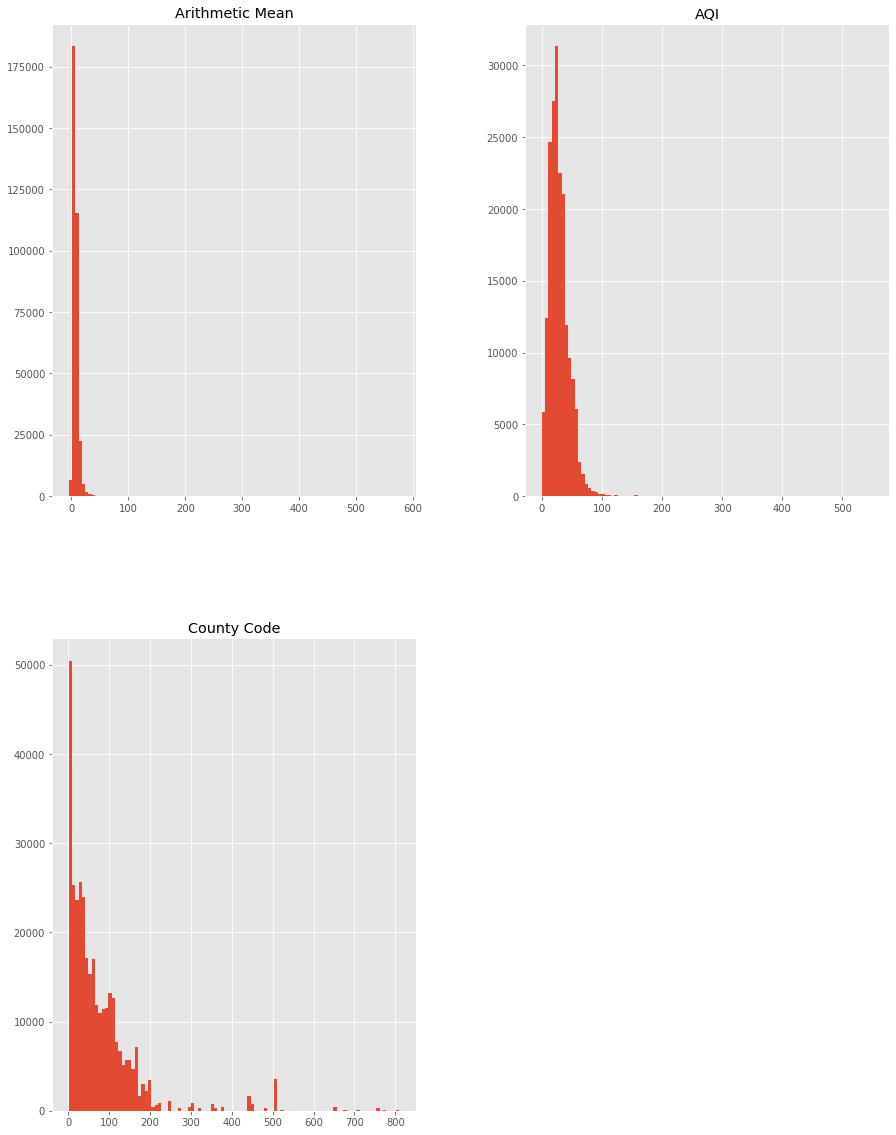

In [20]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
pm25.hist(ax = ax, bins = 100)

AxesSubplot(0.125,0.125;0.775x0.755)
count    337061.000000
mean          7.187375
std           6.445406
min          -4.913043
25%           4.100000
50%           6.200000
75%           8.900000
max         576.600000
Name: Arithmetic Mean, dtype: float64


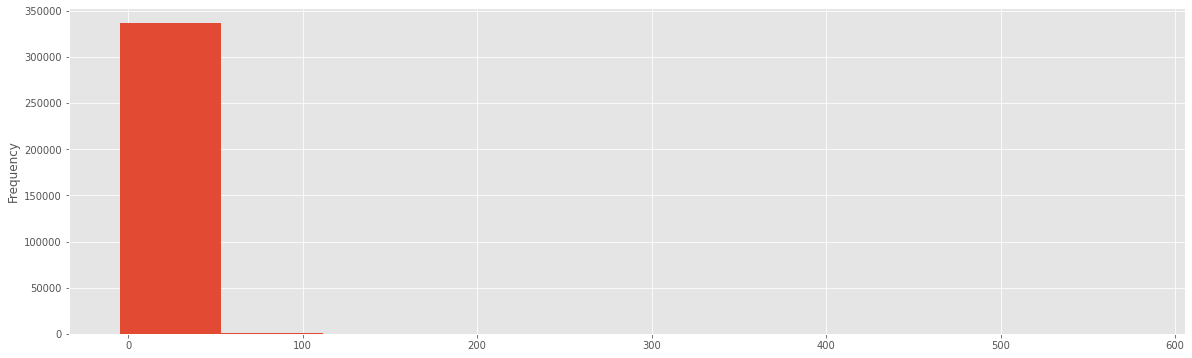

In [21]:
print(pm25['Arithmetic Mean'].plot(kind='hist'))
print(pm25['Arithmetic Mean'].describe())

In [22]:
#PBoxplots
feats = ['Arithmetic Mean', 'AQI']
plotnum = df[feats]
ax = sns.boxplot(data=plotnum, orient="h",fliersize = 3.5, palette="BrBG")
plt.show()

#PM25 has values till up to 576, values from 300-500 are considered Hazardous. These are possible values according to
#https://blissair.com/what-is-pm-2-5.htm#:~:text=On%20a%20very%20clear%20and%20non-hazy%20day%2C%20the,when%20evaluating%20the%20health%20impact%20of%20fine%20particles%3F


NameError: name 'df' is not defined

## Imputation

In [23]:
#Impute negative values in Arithmetic Mean with 0 

pm25['Arithmetic Mean'] = pm25['Arithmetic Mean'].apply(lambda x : x if x > 0 else 0)

#We could also impute outliers with medians of means

#AQI
print('AQI Median',pm25['AQI'].quantile(0.50)) 
print('AQI last quartile', pm25['AQI'].quantile(0.95)) 
print('AQI Describe \n ',pm25['AQI'].describe()) 
#df['BMI'] = np.where(pm25['BMI'] > 58, 26, df['BMI'])

print('\n')

#Arithmetic Mean PM2.5
print("PM2.5 Descriptives")
print(pm25['Arithmetic Mean'].quantile(0.50)) 
print(pm25['Arithmetic Mean'].quantile(0.95))

AQI Median 26.0
AQI last quartile 58.0
AQI Describe 
  count    188273.000000
mean         28.796094
std          17.374933
min           0.000000
25%          17.000000
50%          26.000000
75%          37.000000
max         550.000000
Name: AQI, dtype: float64


PM2.5 Descriptives
6.2
15.145833


In [10]:
#Boxplot Again
feats = ['Arithmetic Mean', 'AQI']
plotnum = df[feats]
ax = sns.boxplot(data=plotnum, orient="h",fliersize = 3.5, palette="BrBG")
plt.show()

NameError: name 'df' is not defined

502
52



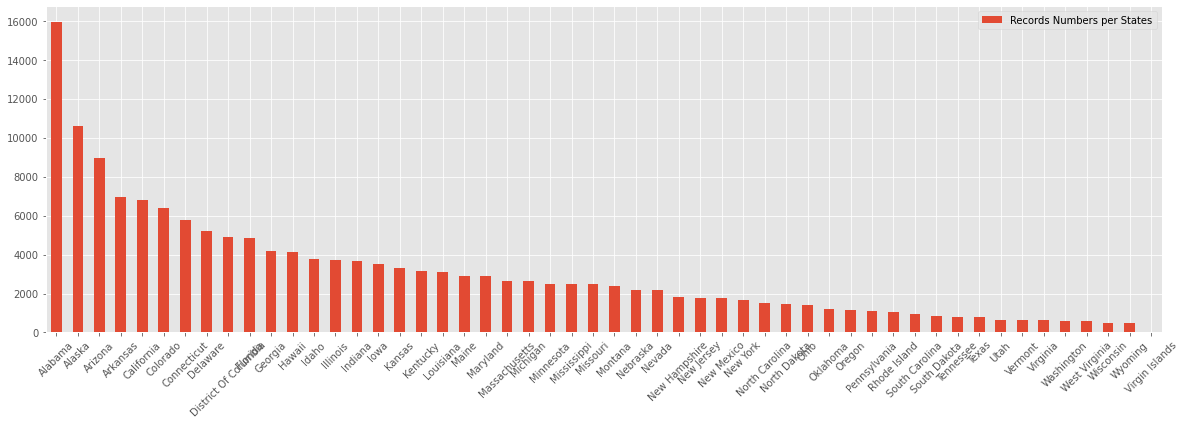

In [11]:
counties = datemask["County Name"].nunique()
print(counties)  #total 605 counties, more than counties in NO2 
states = datemask['State Name'].nunique()
print(states)  #DC and Virgin Islands are not states, so total 50 states (all)

state = datemask["State Name"].value_counts().plot(kind='bar')
state.set_xticks(range(states))
state.set_xticklabels(datemask['State Name'].unique(), rotation=45)
state.legend(["Records Numbers per States"])
print()


## Remove Non-States

In [12]:
datemask = datemask[~(datemask["State Name"]== 'District Of Columbia')]
datemask = datemask[~(datemask["State Name"]== 'Virgin Islands')]

In [13]:
counties = datemask["County Name"].nunique()
print(counties)  #total 605 counties, more than counties in NO2 
states = datemask['State Name'].nunique()
print(states)  #DC and Virgin Islands are not states, so total 50 states (all)

500
50


In [ ]:
#Profile Names Again
counties = datemask["County Name"].nunique()
print(counties)  #total 605 counties, more than counties in NO2 
states = datemask['State Name'].nunique()
print(states)  #DC and Virgin Islands are not states, so total 50 states (all)

state = datemask["State Name"].value_counts().plot(kind='bar')
state.set_xticks(range(states))
state.set_xticklabels(datemask['State Name'].unique(), rotation=45)
state.legend(["Records Numbers per States"])
print()


In [ ]:
uniqcoun = datemask.groupby('State Name')['County Name'].nunique().sort_values()
print(uniqcoun)

In [ ]:
allstate = datemask.groupby('State Name')
stateozone_ppb = allstate['Arithmetic Mean'].mean()
stateaqi = allstate['AQI'].mean()

ax = pd.concat([stateozone_ppb, stateaqi], axis=1).plot(kind='bar')
ax.set_xticks(range(len(allstate)))
ax.set_xticklabels(allstate.groups.keys(), rotation=90)
ax.legend(["State Mean PM2.5", "State Mean AQI Value"])
print()

In [ ]:
#datemask.value_counts(subset=['State Name', 'County Name'], sort=True)
datemask.groupby(by='State Name').agg('nunique')

In [ ]:
datemask.sort_values(by=['State Name', 'County Name', 'City Name', 'CBSA Name'], inplace=True)
datemask.groupby('State Name').count()

datemask.groupby(['State Name', 'County Name']).size().reset_index(name='counts') ,

In [ ]:
#Drop counties based on county record count?
#Also drop state if State has data for less than 3 counties then drop the state?
datemask.to_csv('clean_pm25.csv', index_label= False)